In [2]:
#Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
df=pd.read_csv("/home/spoudel/All_Thesis/Thesis_program/Data/shawnee/location_1/normalized_all_power.csv")
data_size=len(df)
data_size

1810

In [4]:
X=np.array(df[["p0","p1","p2","p3","p4","p5","p6"]])
X.shape

(1810, 7)

In [5]:
db = DBSCAN().fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1789


In [74]:
def dbscan_var(eps=0.4,min_samples=data_size/20):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

#     print(f"For eps={eps} and min_samples={min_samples}")
#     print("Estimated number of clusters: %d" % n_clusters_)
#     print("Estimated number of noise points: %d" % n_noise_)

#     unique_labels = set(labels)
#     core_samples_mask = np.zeros_like(labels, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True

#     colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
#     for k, col in zip(unique_labels, colors):
#         if k == -1:
#             # Black used for noise.
#             col = [0, 0, 0, 1]

#         class_member_mask = labels == k

#         xy = X[class_member_mask & core_samples_mask]
#         plt.plot(
#             xy[:, 0],
#             xy[:, 1],
#             "o",
#             markerfacecolor=tuple(col),
#             markeredgecolor="k",
#             markersize=14,
#         )

#         xy = X[class_member_mask & ~core_samples_mask]
#         plt.plot(
#             xy[:, 0],
#             xy[:, 1],
#             "o",
#             markerfacecolor=tuple(col),
#             markeredgecolor="k",
#             markersize=6,
#         )

#     plt.title(f"Estimated number of clusters: {n_clusters_} for eps={eps} and min_samples={min_samples}")
#     plt.show()
    return n_clusters_
    
    
eps_range=np.arange(0.05,1.5,.05)
min_sample_range=np.arange(1,25,0.5)
n_clusters_= [[dbscan_var(eps=x,min_samples=y) for x in eps_range] for y in min_sample_range]

In [75]:
n_clusters_

[[1810,
  1810,
  1810,
  1809,
  1804,
  1798,
  1785,
  1757,
  1715,
  1653,
  1540,
  1434,
  1303,
  1142,
  996,
  809,
  665,
  528,
  426,
  350,
  268,
  211,
  162,
  123,
  93,
  75,
  58,
  44,
  37],
 [0,
  0,
  0,
  1,
  6,
  12,
  22,
  43,
  63,
  93,
  112,
  129,
  137,
  137,
  132,
  138,
  114,
  85,
  72,
  56,
  44,
  34,
  25,
  17,
  15,
  14,
  11,
  7,
  7],
 [0,
  0,
  0,
  1,
  6,
  12,
  22,
  43,
  63,
  93,
  112,
  129,
  137,
  137,
  132,
  138,
  114,
  85,
  72,
  56,
  44,
  34,
  25,
  17,
  15,
  14,
  11,
  7,
  7],
 [0,
  0,
  0,
  0,
  0,
  0,
  3,
  9,
  17,
  26,
  40,
  31,
  44,
  40,
  42,
  46,
  37,
  31,
  27,
  19,
  16,
  12,
  8,
  4,
  2,
  2,
  1,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  3,
  9,
  17,
  26,
  40,
  31,
  44,
  40,
  42,
  46,
  37,
  31,
  27,
  19,
  16,
  12,
  8,
  4,
  2,
  2,
  1,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  7,
  17,
  20,
  13,
  26,
  18,
  19,
  21,
  16,
  12,
  13,
  13,
 

In [76]:
n_clusters_=np.array(n_clusters_)
shape=n_clusters_.shape
clusters=np.array([20 if i>20 else i for i in n_clusters_.flatten() ])
clusters=clusters.reshape(shape)

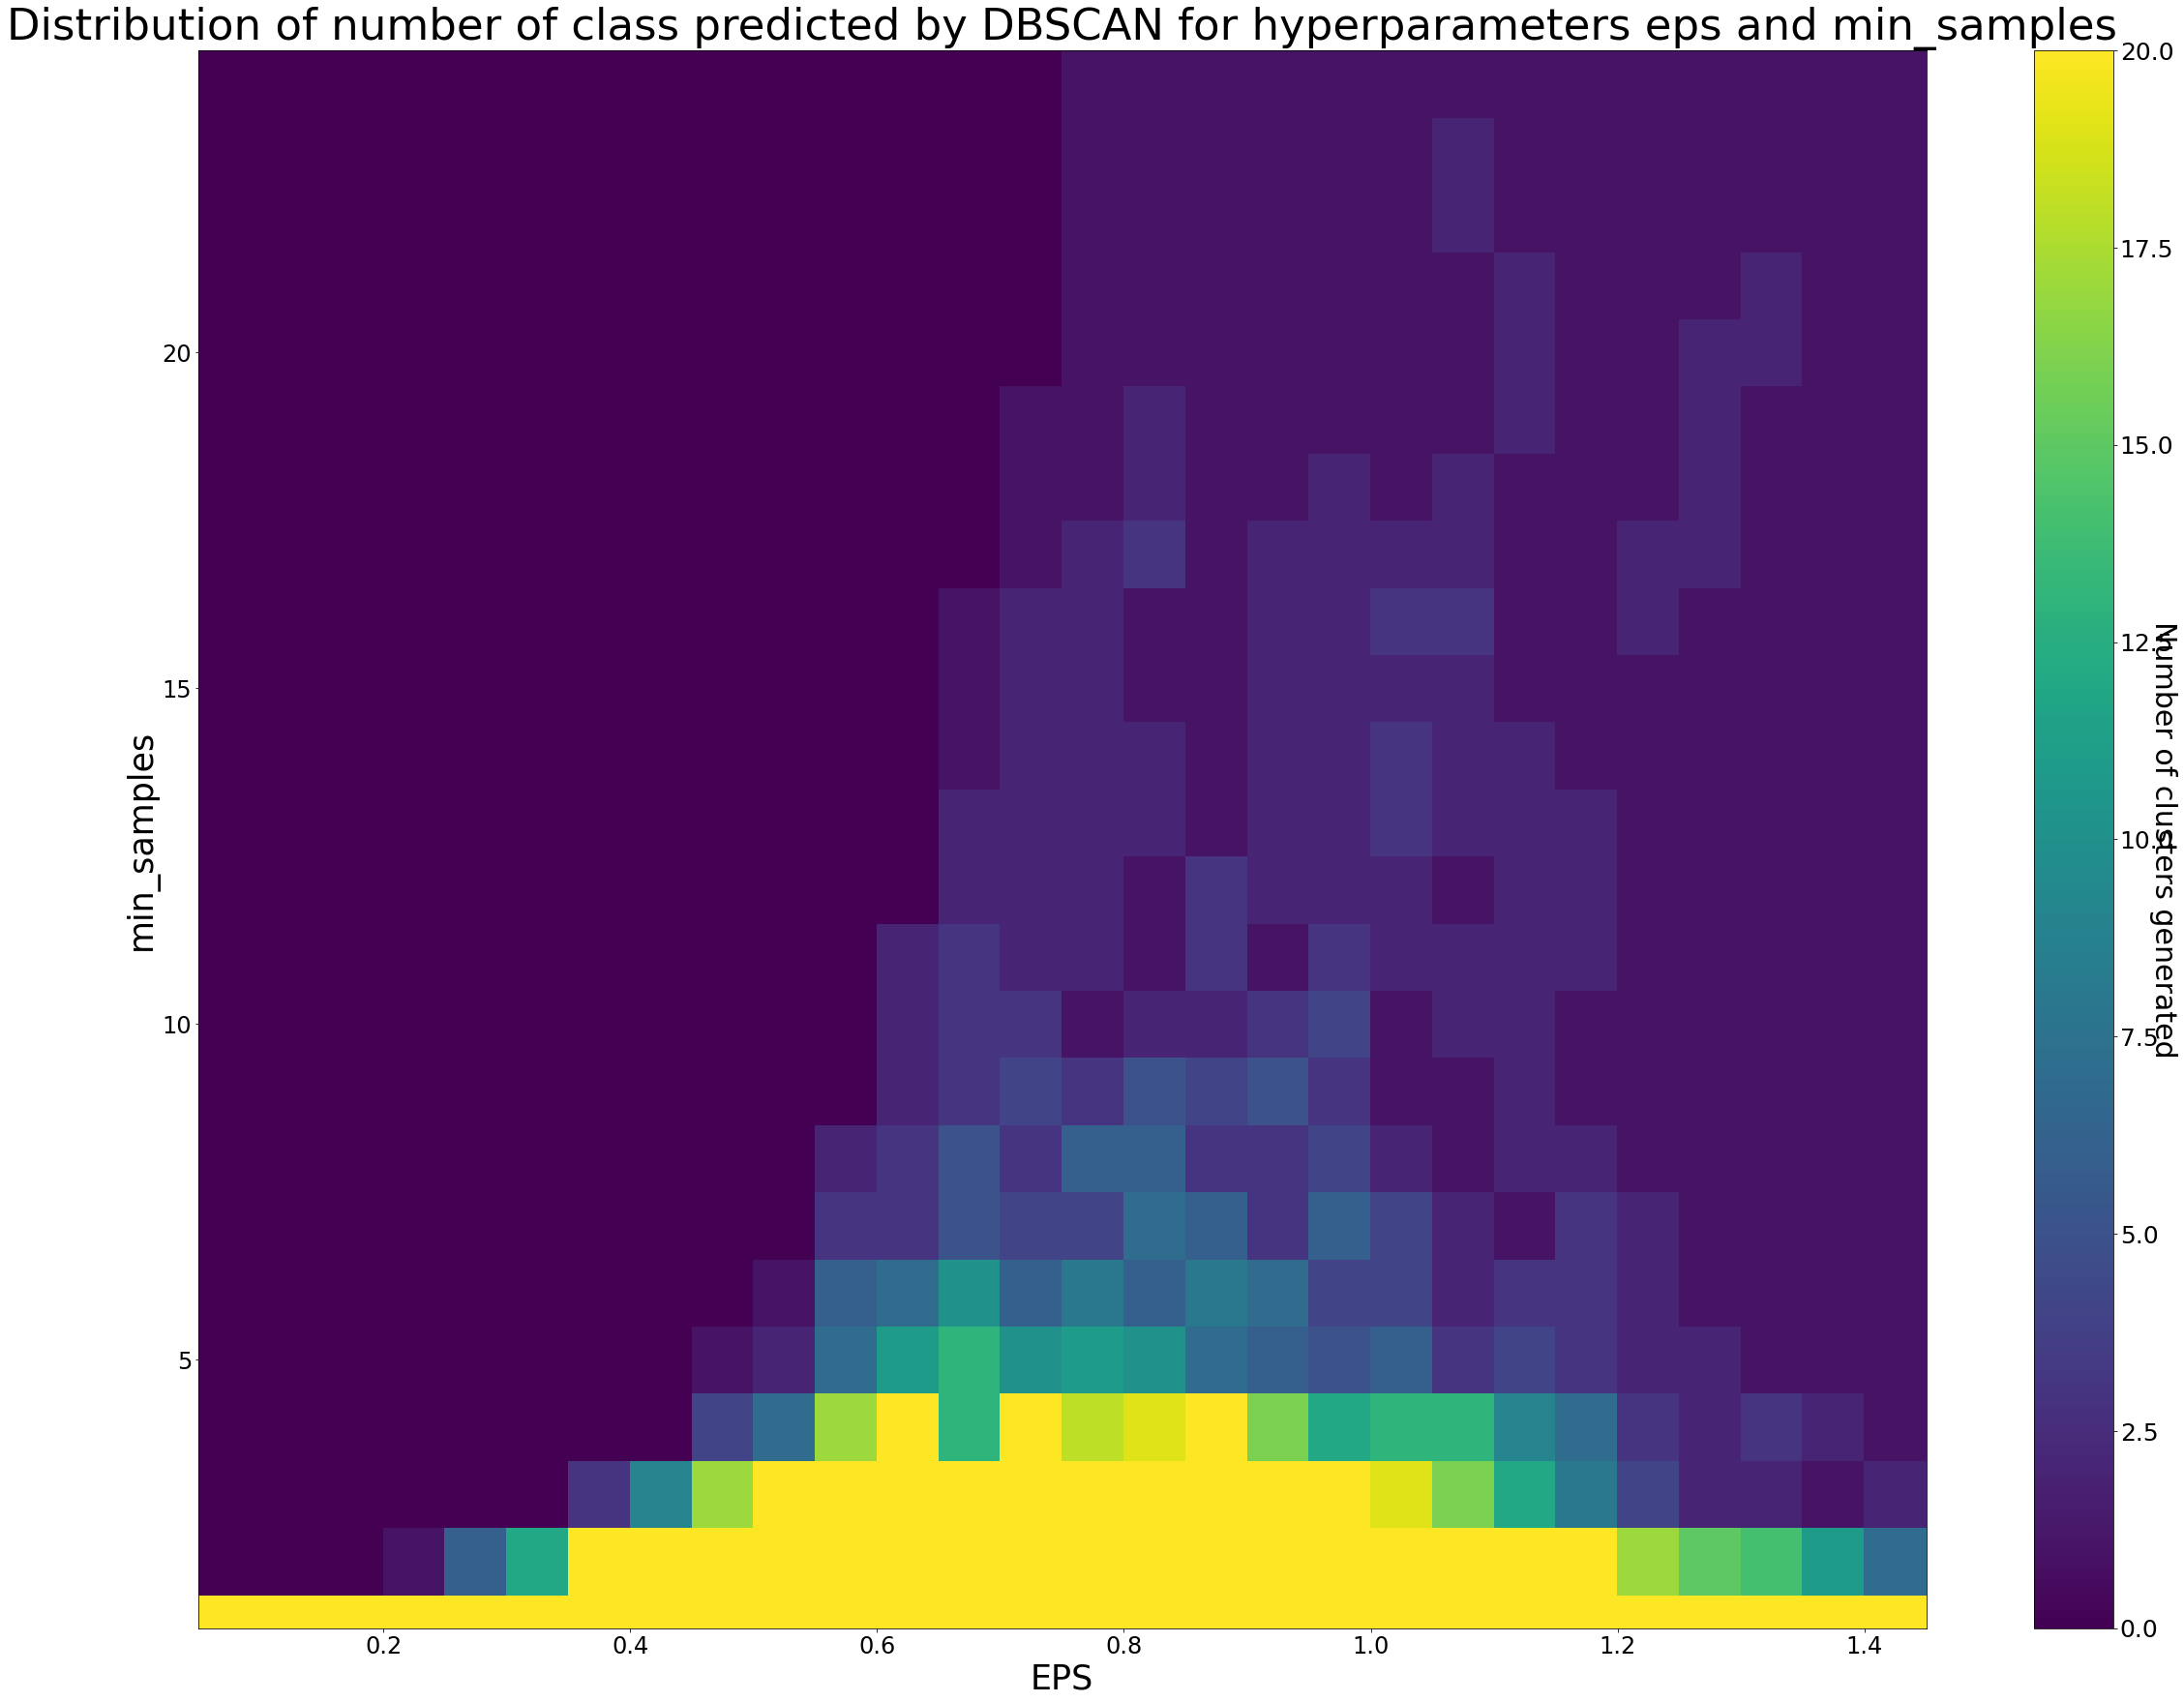

In [86]:
xv,yv=np.meshgrid(eps_range,min_sample_range)
xv.shape
plt.figure(figsize=(40,30))
plt.pcolormesh(xv,yv,clusters)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=25)
cb.set_label('Number of clusters generated', rotation=270, size=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title("Distribution of number of class predicted by DBSCAN for hyperparameters eps and min_samples", size=45)
plt.xlabel("EPS", size=35)
plt.ylabel("min_samples", size=35)
plt.show()

In [88]:
!pip install hdbscan

  Using cached hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl
  Using cached Cython-0.29.34-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)


array([-1])

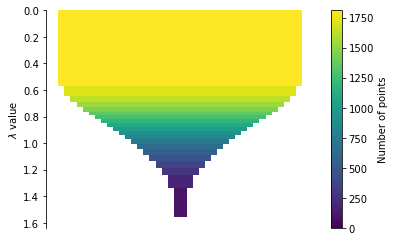

In [91]:
import hdbscan

import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 8, cluster_selection_epsilon=0.7)
labels = hdbscan.fit_predict(X)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)